In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import seaborn as sns

In [2]:
#read the file
df1= pd.read_csv('Documents/GitHub/IF/data.csv')
df1.head()


,date,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,...,USD tot,CNY tnt,ZA tnt,CHF tnt,JPY tnt,USD tnt,CNY nfa,ZA nfa,CHF nfa,JPY nfa
0,4-Jan,8.28,6.93,1.24,106.48,0.018991,0.155518,0.112978,0.182694,0.060531,...,1.055785,0.959459,0.903187,0.992303,0.951446,0.923723,0.019634,-0.005604,0.101181,0.026993
1,4-Feb,8.28,6.77,1.24,106.55,0.019552,0.173791,0.123553,0.197181,0.062438,...,1.058788,0.970922,0.906163,0.992006,0.953512,0.923310,0.019634,-0.005604,0.101181,0.026993
2,4-Mar,8.28,6.64,1.28,108.62,0.020094,0.221002,0.141914,0.227796,0.076555,...,1.058556,0.973295,0.901913,0.993889,0.953608,0.923854,0.019634,-0.005604,0.101181,0.026993
3,4-Apr,8.28,6.56,1.30,107.25,0.019944,0.222297,0.136795,0.204015,0.071361,...,1.063627,0.978012,0.908809,0.990508,0.956701,0.931846,0.019121,-0.014133,0.101861,0.027576
4,4-May,8.28,6.79,1.28,112.35,0.020147,0.194379,0.138205,0.186367,0.066312,...,1.052013,0.978698,0.910850,0.990748,0.955716,0.939221,0.019121,-0.014133,0.101861,0.027576


In [3]:
# choose the data started from 2007-02 and stop on 2018-06
df=df1.drop(range(0, 37),)
df.to_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata.csv',sep=',')
df=pd.read_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata.csv')
df=df.iloc[:137, 1:]
df.head()


,date,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,...,USD tot,CNY tnt,ZA tnt,CHF tnt,JPY tnt,USD tnt,CNY nfa,ZA nfa,CHF nfa,JPY nfa
0,7-Feb,7.75,7.17,1.24,120.45,0.022279,0.184524,0.156641,0.220458,0.088510,...,1.027975,1.004013,0.993803,1.011551,1.007261,0.991670,0.045397,-0.088698,0.112059,0.031747
1,7-Mar,7.74,7.35,1.22,117.28,0.023089,0.217070,0.176128,0.252445,0.102046,...,1.019118,1.010500,1.002075,1.012849,1.004137,0.997451,0.045397,-0.088698,0.112059,0.031747
2,7-Apr,7.72,7.12,1.21,118.83,0.022811,0.230439,0.162478,0.220921,0.093913,...,1.009623,1.019027,1.009303,1.008496,1.010309,1.003305,0.048586,-0.095974,0.112575,0.032114
3,7-May,7.67,7.02,1.22,120.73,0.023013,0.204929,0.176713,0.241660,0.096689,...,1.002863,1.021423,1.018314,1.014282,1.009250,1.008266,0.048586,-0.095974,0.112575,0.032114
4,7-Jun,7.63,7.17,1.23,122.62,0.023133,0.212815,0.175452,0.241184,0.101050,...,0.995454,1.021731,1.033646,1.013798,1.012358,1.009219,0.048586,-0.095974,0.112575,0.032114


In [4]:
# describe the data
df.describe()

,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,USD PMI,...,USD tot,CNY tnt,ZA tnt,CHF tnt,JPY tnt,USD tnt,CNY nfa,ZA nfa,CHF nfa,JPY nfa
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,6.606934,9.931825,0.997664,100.889197,0.023740,0.148240,0.166965,0.258644,0.092731,52.816788,...,0.998311,0.931056,1.090514,0.985733,1.010421,1.002393,0.045746,-0.145655,0.097557,0.030258
std,0.405935,2.664483,0.093441,13.900001,0.001729,0.032706,0.019546,0.045219,0.010789,5.248929,...,0.031560,0.078714,0.066601,0.025015,0.022300,0.025801,0.009771,0.016457,0.004249,0.002138
min,6.100000,6.700000,0.780000,76.770000,0.019337,0.082851,0.118153,0.171324,0.056192,33.100000,...,0.892476,0.783453,0.961065,0.941437,0.956175,0.956126,0.029831,-0.165285,0.092550,0.027129
25%,6.300000,7.600000,0.940000,90.290000,0.022437,0.119854,0.154210,0.219659,0.086557,50.800000,...,0.980989,0.852701,1.018596,0.956353,0.997936,0.989097,0.037068,-0.157901,0.095461,0.028103
50%,6.560000,9.180000,0.970000,102.130000,0.023549,0.145372,0.165935,0.257943,0.093542,53.000000,...,0.995530,0.953135,1.134978,0.990106,1.013528,0.999888,0.045473,-0.146286,0.096866,0.030005
75%,6.830000,12.090000,1.040000,112.340000,0.025204,0.169366,0.178138,0.292126,0.100954,56.500000,...,1.026417,1.002772,1.145675,1.002698,1.026667,1.006810,0.055715,-0.137957,0.097584,0.032272
max,7.750000,16.390000,1.240000,123.750000,0.026837,0.230439,0.230570,0.408002,0.117965,60.800000,...,1.062587,1.058705,1.158477,1.035381,1.071573,1.130300,0.061744,-0.088698,0.112575,0.033481


In [5]:
# operate on the Chinese data firstly. take log on each variable(keep M2YoY unchanged )
df['lCHF'] = np.log(df[['CHF']])
df['lCHF TO'] = np.log(df[['CHF TO']])
df['lCHF PMI'] = np.log(df[['CHF PMI']])
df['lCHF tot']=np.log(df['CHF tot']/df['USD tot'])
df['lCHF tnt']=np.log(df['CHF tnt']/df['USD tnt'])
# take ADF test on these 4 variables to check its stableness
print(ts.adfuller(df['lCHF']))
print(ts.adfuller(df['lCHF TO']))
print(ts.adfuller(df['lCHF PMI']))
print(ts.adfuller(df['CHF M2YoY']))
print(ts.adfuller(df['lCHF tot']))
print(ts.adfuller(df['lCHF tnt']))
print(ts.adfuller(df['CHF nfa']))
# raw data not stable under 1% significant level



(-2.5795513372863104, 0.0972976675261012, 1, 135, {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}, -563.1265065051339)
(-1.5357977975335575, 0.5157342560258817, 12, 124, {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}, -245.07886554933464)
(-2.4324902978252516, 0.13277542136931114, 2, 134, {'1%': -3.480118600110386, '5%': -2.8833618426136196, '10%': -2.578407034974382}, -409.72458842930973)
(-2.7091938244172575, 0.07246080322612641, 13, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, 434.1185102791628)
(-4.647456733251803, 0.0001055086699582409, 4, 132, {'1%': -3.4808880719210005, '5%': -2.8836966192225284, '10%': -2.5785857598714417}, -558.1289873740594)
(-3.6300497889892167, 0.0052118551667697955, 2, 134, {'1%': -3.480118600110386, '5%': -2.8833618426136196, '10%': -2.578407034974382}, -883.0743411001561)
(-4.081596326335793, 0.0010386334698638175, 8, 128, {'1%': -3.482500693988799

In [6]:
# take first-order and conduct ADF test
df['difflCHF'] = df['lCHF'].diff(periods = 1)
df['difflCHF TO'] = df['lCHF TO'].diff(periods = 1)
df['difflCHF PMI'] = df['lCHF PMI'].diff(periods = 1)
df['diffCHF M2YoY'] = df['CHF M2YoY'].diff(periods = 1)
df['difflCHF tot'] = df['lCHF tot'].diff(periods = 1)
df['difflCHF tnt'] = df['lCHF tnt'].diff(periods = 1)
df['diffCHF nfa'] = df['CHF nfa'].diff(periods = 1)

print(ts.adfuller(df['difflCHF'].drop(0,)))
print(ts.adfuller(df['difflCHF TO'].drop(0,)))
print(ts.adfuller(df['difflCHF PMI'].drop(0,)))
print(ts.adfuller(df['diffCHF M2YoY'].drop(0,)))
print(ts.adfuller(df['difflCHF tot'].drop(0,)))
print(ts.adfuller(df['difflCHF tnt'].drop(0,)))
print(ts.adfuller(df['diffCHF nfa'].drop(0,)))
# all the 


(-4.69254012963799, 8.691050312457504e-05, 11, 124, {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}, -555.7318865412583)
(-3.1493919889017734, 0.023107401058945928, 11, 124, {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}, -246.21695879823562)
(-11.871668503267358, 6.4817336975101e-22, 1, 134, {'1%': -3.480118600110386, '5%': -2.8833618426136196, '10%': -2.578407034974382}, -397.9055252895596)
(-3.061271618682082, 0.029555210306270053, 12, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, 436.6248658650585)
(-4.674013420915793, 9.413837387910046e-05, 11, 124, {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}, -553.5798089931518)
(-5.074086177780547, 1.5802252802097505e-05, 4, 131, {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}, -865.809011546089)
(-2.893182831824202, 0.046146503899952146, 8, 127, {'1%': -3.482920063655088

In [7]:
df['lCHF_1'] = 0
size_sample = 136

for i in range(size_sample):
    df.loc[i,'lCHF_1'] = df.loc[i+1,'difflCHF']
    
df.loc[size_sample,'lCHF_1'] = df.loc[0,'difflCHF']



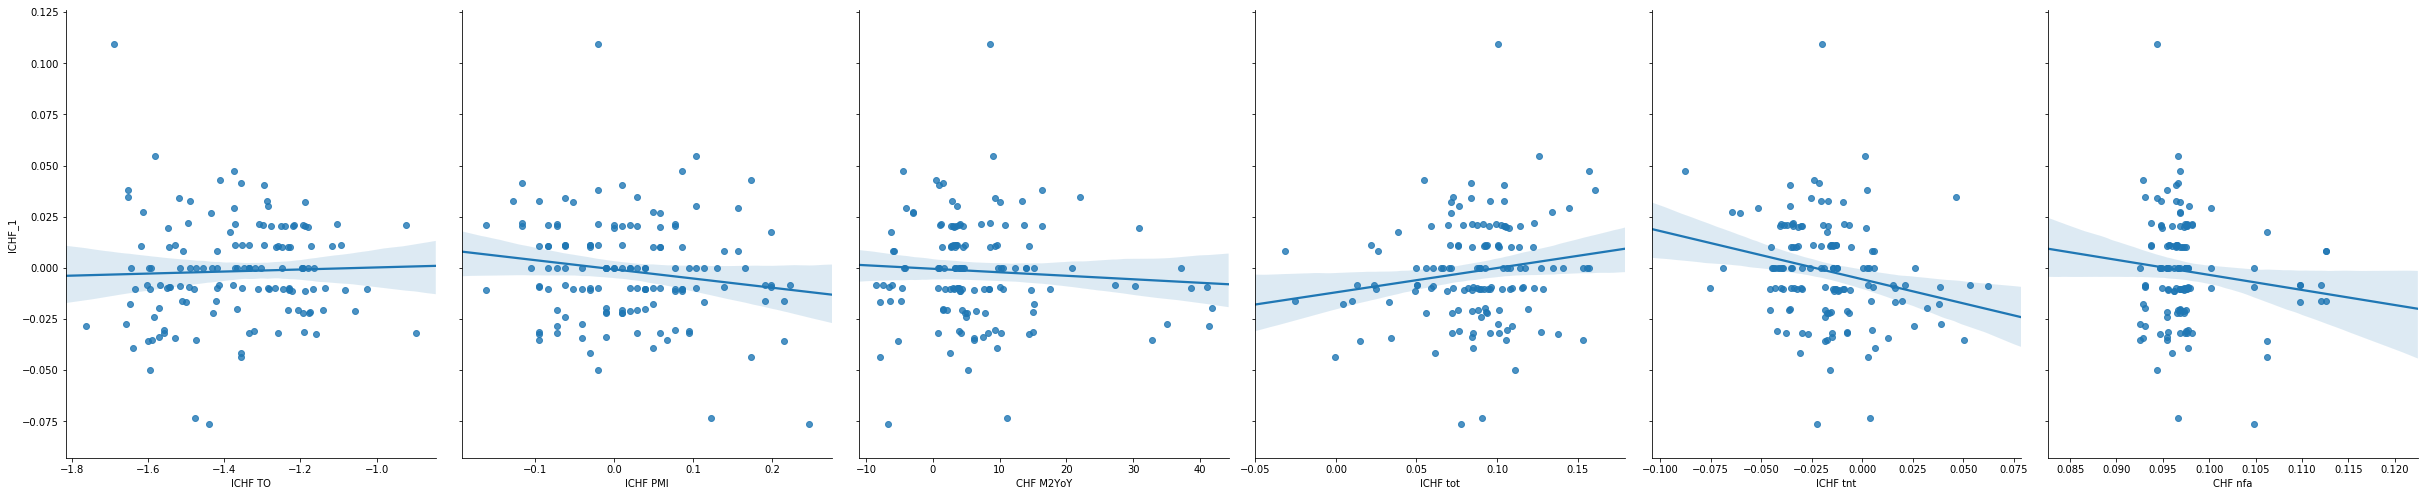

In [8]:
# check relation
sns.pairplot(df, x_vars=['lCHF TO','lCHF PMI','CHF M2YoY','lCHF tot','lCHF tnt','CHF nfa'], y_vars='lCHF_1', size=7, aspect=0.8, kind='reg')  
plt.show()


In [9]:
# run regression with whole data
df['const'] = 1 # create column of constant

reg_int = sm.OLS(endog=df['lCHF_1'], exog=df[['const', 'lCHF TO','lCHF PMI','CHF M2YoY','lCHF tot','lCHF tnt','CHF nfa']], missing='drop')
results = reg_int.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 lCHF_1   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2.479
Date:                Wed, 07 Nov 2018   Prob (F-statistic):             0.0265
Time:                        21:05:30   Log-Likelihood:                 316.79
No. Observations:                 136   AIC:                            -619.6
Df Residuals:                     129   BIC:                            -599.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0264      0.095     -0.277      0.7

In [10]:
#results.resid
print(ts.adfuller(results.resid))



(-10.95520059222996, 8.597192618740743e-20, 0, 135, {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}, -564.9885594916134)


In [11]:
# Now we do it recursively with window length=60
size_sample = 137
size_subsample = 60

fcst_beer60 = np.zeros(size_sample - size_subsample)
fcst_error_beer60 = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):

    reg_beersub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lCHF_1'], exog=df.loc[df.index[i:size_subsample+i],['const', 'lCHF TO','lCHF PMI','CHF M2YoY','lCHF tot','lCHF tnt','CHF nfa']], missing='drop')
    results_sub = reg_beersub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_beer60[i] = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lCHF TO','lCHF PMI','CHF M2YoY','lCHF tot','lCHF tnt','CHF nfa']]])
    error = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lCHF TO','lCHF PMI','CHF M2YoY','lCHF tot','lCHF tnt','CHF nfa']]]) - df.loc[size_subsample+i, 'lCHF_1']
    fcst_error_beer60[i] = error
    
fcst_error_beer60=np.where(np.isnan(fcst_error_beer60),0,fcst_error_beer60)
fcst_error_beer60
#fcst_beer


array([-0.01465412, -0.01235478, -0.03528825, -0.0223269 , -0.02234732,
        0.00758456,  0.02755223,  0.00260042, -0.01833104,  0.01859741,
       -0.00261978, -0.01467373, -0.0500644 , -0.0021618 , -0.04021873,
        0.01939144, -0.03663106,  0.0109786 , -0.00022396,  0.01132058,
       -0.01725397,  0.0148589 , -0.01377113,  0.00345283, -0.00235286,
       -0.00673559, -0.01578264, -0.00938262, -0.00105893, -0.00873846,
       -0.02086716, -0.00172372, -0.00491171, -0.01343535,  0.0439892 ,
        0.00855906, -0.03093857,  0.02646128,  0.03526463, -0.00087095,
       -0.02474446, -0.01859478, -0.0119559 , -0.00457102, -0.05024851,
        0.00878954, -0.02109019,  0.01299994,  0.00034827,  0.01700844,
       -0.026348  , -0.00195051, -0.01336779,  0.01234111,  0.00251951,
       -0.02553525, -0.0149905 , -0.02683176,  0.00504327,  0.01342748,
        0.00198656, -0.00510557,  0.00691467,  0.01860825,  0.00355308,
       -0.00553249, -0.00370997, -0.0238486 , -0.01650696, -0.01

In [13]:
# Now we do it recursively with window length=60
size_sample = 137
size_subsample = 30

fcst_beer30 = np.zeros(size_sample - size_subsample)
fcst_error_beer30 = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):

    reg_beersub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lCHF_1'], exog=df.loc[df.index[i:size_subsample+i],['const', 'lCHF TO','lCHF PMI','CHF M2YoY','lCHF tot','lCHF tnt','CHF nfa']], missing='drop')
    results_sub = reg_beersub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_beer30[i] = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lCHF TO','lCHF PMI','CHF M2YoY','lCHF tot','lCHF tnt','CHF nfa']]])
    error = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lCHF TO','lCHF PMI','CHF M2YoY','lCHF tot','lCHF tnt','CHF nfa']]]) - df.loc[size_subsample+i, 'lCHF_1']
    fcst_error_beer30[i] = error
    
fcst_error_beer30=np.where(np.isnan(fcst_error_beer30),0,fcst_error_beer30)


In [14]:
# Now we do it recursively with window length=60
size_sample = 137
size_subsample = 90

fcst_beer90 = np.zeros(size_sample - size_subsample)
fcst_error_beer90 = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):

    reg_beersub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lCHF_1'], exog=df.loc[df.index[i:size_subsample+i],['const', 'lCHF TO','lCHF PMI','CHF M2YoY','lCHF tot','lCHF tnt','CHF nfa']], missing='drop')
    results_sub = reg_beersub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_beer90[i] = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lCHF TO','lCHF PMI','CHF M2YoY','lCHF tot','lCHF tnt','CHF nfa']]])
    error = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lCHF TO','lCHF PMI','CHF M2YoY','lCHF tot','lCHF tnt','CHF nfa']]]) - df.loc[size_subsample+i, 'lCHF_1']
    fcst_error_beer90[i] = error
    
fcst_error_beer90=np.where(np.isnan(fcst_error_beer90),0,fcst_error_beer90)



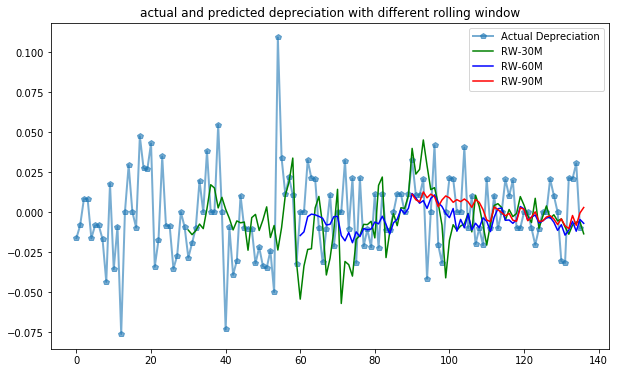

In [15]:
#改变rolling window 长度
df_d = df.set_index('date')
fig, ax = plt.subplots(figsize = (10, 6))

y = df['lCHF_1']
ax.plot(y, 'p-', linewidth=2, label='Actual Depreciation', alpha=0.6)

v1=np.append(np.zeros(30),fcst_beer30)
v1[v1==0]=None
ax.plot(v1, 'g-',label = 'RW-30M')
ax.legend()

v2=np.append(np.zeros(60),fcst_beer60)
v2[v2==0]=None
ax.plot(v2, 'b-',label = 'RW-60M')
ax.legend()

v3=np.append(np.zeros(90),fcst_beer90)
v3[v3==0]=None
ax.plot(v3, 'r-',label = 'RW-90M')
ax.legend()

ax.set_title('actual and predicted depreciation with different rolling window') 

plt.show()

In [16]:
# Compute RMSE for the Beer model
rmse_beer60 = np.sqrt(np.mean(fcst_error_beer60**2))
rmse_beer60


0.019907287492600467

In [17]:
rmse_rw = np.sqrt(np.mean(df.loc[size_subsample: size_sample-1, 'lCHF_1']**2))
rmse_rw


0.01929251636237091

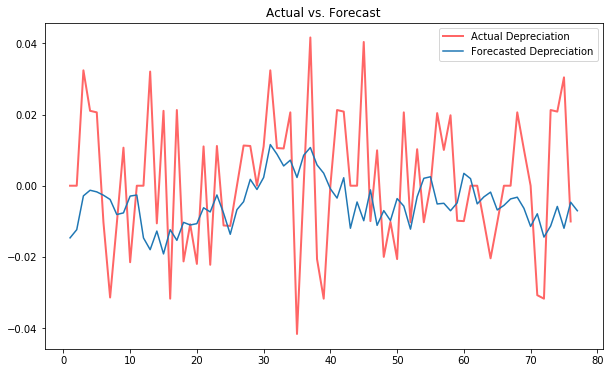

In [18]:
df_d = df.set_index('date')
size_subsample=60
fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()
# size_subsample no need to +1
#x=df.loc[size_subsample: size_sample,'date']
yB1 = df.loc[size_subsample: size_sample, 'lCHF_1']
ax.plot(x, yB1, 'r-', linewidth=2, label=r'Actual Depreciation', alpha=0.6)

yB2 = fcst_beer60
ax.plot(x, yB2, label = 'Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()

In [19]:
#比值偏离度
devB1=(yB1-yB2)/yB2
devB1.describe()


count    76.000000
mean     -1.295472
std       4.945391
min     -18.989471
25%      -3.155932
50%      -1.000000
75%       1.091437
max      10.334348
Name: lCHF_1, dtype: float64

In [20]:

devB2=yB1-yB2
devB2.describe()

count    76.000000
mean      0.005895
std       0.019278
min      -0.043989
25%      -0.007082
50%       0.004741
75%       0.018397
max       0.050249
Name: lCHF_1, dtype: float64

In [21]:
#homework replicate
dfhw1 = pd.read_csv('Documents/GitHub/IF/data-HW.csv')
dfhw1.head()


,date,CNY,ZA,CHF,JPY,C_IBR,ZA_IBR,CHF_IBR,JPY_IBR,U_IBR,...,C_PMI,ZA_PMI,CHF_PMI,JPY_PMI,U_PMI,C_REER,ZA_REER,CHF_REER,JPY_REER,U_REER
0,7-Jan,7.7898,7.19,1.24,120.58,1.94,8.70,2.12,0.43,5.10,...,55.1,50.6,62.4,NaN,49.5,88.38,92.23,98.5578,84.74,108.91
1,7-Feb,7.7546,7.17,1.24,120.45,1.91,8.66,2.13,0.59,5.11,...,53.1,57.8,64.4,53.0,51.9,89.59,91.48,98.7527,83.20,108.37
2,7-Mar,7.7391,7.35,1.22,117.28,1.95,8.28,2.24,0.56,5.02,...,56.1,59.1,61.5,52.5,50.7,88.16,88.88,98.8296,85.50,108.65
3,7-Apr,7.7247,7.12,1.21,118.83,2.05,8.28,2.30,0.58,4.84,...,58.6,54.0,61.8,52.3,52.6,87.07,91.24,99.9483,83.44,107.55
4,7-May,7.6704,7.02,1.22,120.73,2.08,8.50,2.36,0.58,4.71,...,55.7,55.5,60.4,51.4,52.5,87.66,92.23,100.1821,81.45,106.82


In [22]:
# choose the data started from 2007-02 and stop on 2018-06
dfhw=dfhw1.drop(range(0, 1),)
dfhw.to_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata1.csv',sep=',')
dfhw=pd.read_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata1.csv')
dfhw=dfhw.iloc[:137, 1:]
dfhw.tail()

,date,CNY,ZA,CHF,JPY,C_IBR,ZA_IBR,CHF_IBR,JPY_IBR,U_IBR,...,C_PMI,ZA_PMI,CHF_PMI,JPY_PMI,U_PMI,C_REER,ZA_REER,CHF_REER,JPY_REER,U_REER
132,18-Feb,6.3162,11.82,0.93,107.82,3.24,7.12,-0.86,-0.18,1.66,...,50.3,52.3,65.5,54.1,60.8,127.61,85.87,101.0719,74.40,110.55
133,18-Mar,6.3220,11.84,0.95,106.00,3.11,7.06,-0.79,-0.14,1.72,...,51.5,48.3,60.3,53.1,59.3,125.87,86.03,101.4584,75.77,111.43
134,18-Apr,6.2975,12.09,0.97,107.43,2.72,6.98,-0.80,-0.12,1.81,...,51.4,48.8,63.6,53.8,57.3,126.34,85.02,101.6703,74.66,111.85
135,18-May,6.3758,12.53,1.00,109.69,2.77,7.01,-0.90,-0.13,1.92,...,51.9,49.8,62.4,52.8,58.7,127.26,84.02,102.0573,74.51,115.38
136,18-Jun,6.4556,13.30,0.99,110.03,3.01,7.03,-0.84,-0.12,1.92,...,51.5,44.8,61.8,53.0,60.2,126.42,80.35,102.0615,74.95,117.31


In [23]:
# compute the change in the exchange rate: take log and first difference to compute depreciation (dep)
dfhw['lCHF'] = np.log(dfhw[['CHF']])
dfhw['lCHF_1'] = dfhw['lCHF'].diff(periods = 1)


In [24]:
# Create a new column to reindex depreciation - why?
dfhw['lCHF_1'] = 0
size_sample = 136

for i in range(size_sample):
    dfhw.loc[i,'lCHF_1'] = dfhw.loc[i+1,'lCHF']
    dfhw.loc[size_sample,'lCHF_1'] = dfhw.loc[0,'lCHF']



In [25]:
#Next we compute the independent variable: interest differential across US and China.
dfhw['int_diff'] = dfhw['C_IBR'] - dfhw['U_IBR']


In [26]:
# the pattern is not that clear so we run the regression
dfhw['const'] = 1 # create column of constant

reg_int = sm.OLS(endog=df['lCHF_1'], exog=dfhw[['const', 'int_diff']], missing='drop')
results = reg_int.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 lCHF_1   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.215
Date:                Wed, 07 Nov 2018   Prob (F-statistic):              0.272
Time:                        21:07:54   Log-Likelihood:                 309.98
No. Observations:                 136   AIC:                            -616.0
Df Residuals:                     134   BIC:                            -610.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0049      0.004     -1.346      0.1

In [27]:
# Now we do rolling window to forecast through UIP model
size_sample = 137
size_subsample = 60

# How many regressions can we run? How many forecast errors can we compute?
fcst_int = np.zeros(size_sample - size_subsample)
fcst_error_int = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):
    reg_intsub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lCHF_1'], exog=dfhw.loc[dfhw.index[i:size_subsample+i],['const', 'int_diff']], missing='drop')
    results_sub = reg_intsub.fit()
    
    fcst_int[i] = results_sub.predict(exog = [dfhw.loc[size_subsample+i,['const', 'int_diff']]])
    error = results_sub.predict(exog = [1, dfhw.loc[size_subsample+i,'int_diff']]) - df.loc[size_subsample+i, 'lCHF_1']
    fcst_error_int[i] = error

fcst_error_int=np.where(np.isnan(fcst_error_int),0,fcst_error_int)    
fcst_error_int


array([-0.00209319, -0.00237507, -0.03483847, -0.0226342 , -0.02260647,
        0.00845282,  0.03163407,  0.01146769, -0.00928548,  0.02265326,
        0.00066711, -0.00056198, -0.03284396,  0.01155431, -0.02061658,
        0.03271984, -0.01851693,  0.02518199,  0.01274317,  0.02378178,
       -0.01164163,  0.02287663, -0.011497  ,  0.01072531,  0.00930601,
       -0.00282681, -0.01410878, -0.01370845, -0.00234176, -0.01281465,
       -0.0335038 , -0.01065491, -0.01045124, -0.0207676 ,  0.04233318,
       -0.00046918, -0.0424735 ,  0.02074553,  0.03060209, -0.00921432,
       -0.03516522, -0.02699797, -0.00443381, -0.00224127, -0.040876  ,
        0.0104876 , -0.00923979,  0.02149702,  0.01050471,  0.02100285,
       -0.02070689,  0.012392  , -0.00795453,  0.01298712,  0.0019342 ,
       -0.01808877, -0.00618661, -0.01532025,  0.01308333,  0.01299337,
        0.00315674,  0.00324679,  0.01297182,  0.02234256,  0.0109562 ,
        0.0003305 ,  0.00084148, -0.0191935 , -0.00825866,  0.00

In [28]:
#Now we do the same to obtain forecast errors made by the Taylor-rule model:
# Taylor-Rule model

# inflation differential
dfhw['pi_diff'] = dfhw['CHF_CPI'] - dfhw['U_CPI']

fcst_tr = np.zeros(size_sample - size_subsample)
fcst_error_tr = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):
    # Create a column to store the output gap difference and update it in each loop
    y_CHF = dfhw['CHF_PMI'] - np.mean(dfhw.loc[i:size_subsample-1+i, 'CHF_PMI'])
    y_U = dfhw['U_PMI'] - np.mean(dfhw.loc[i:size_subsample-1+i, 'U_PMI'])
    dfhw['y_diff'] = y_CHF - y_U
    
    reg_trsub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lCHF_1'], exog=dfhw.loc[dfhw.index[i:size_subsample+i],['const', 'pi_diff','y_diff']], missing='drop')
    results_sub = reg_trsub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_tr[i] = results_sub.predict(exog = [dfhw.loc[size_subsample+i,['const', 'pi_diff','y_diff']]])
    error = results_sub.predict(exog = [dfhw.loc[size_subsample+i,['const', 'pi_diff','y_diff']]]) - df.loc[size_subsample+i, 'lCHF_1']
    fcst_error_tr[i] = error
    
fcst_error_tr=np.where(np.isnan(fcst_error_tr),0,fcst_error_tr)
fcst_error_tr

array([ 0.00177451,  0.00089269, -0.0278732 , -0.01057413, -0.01230653,
        0.02302656,  0.04358   ,  0.01578077, -0.01040197,  0.02068289,
       -0.00269547, -0.00192888, -0.0320017 ,  0.01275298, -0.01959561,
        0.03357102, -0.02138213,  0.02131987,  0.0094316 ,  0.01931114,
       -0.01435026,  0.01640642, -0.01421702, -0.00021841, -0.00026939,
       -0.00628888, -0.01674285, -0.01241824, -0.00248673, -0.00866549,
       -0.02629227, -0.00239451, -0.00345867, -0.0088337 ,  0.04138077,
        0.01390404, -0.02822452,  0.02871996,  0.04095157,  0.00965115,
       -0.0105553 , -0.01026562, -0.00716779,  0.00093182, -0.04277972,
        0.00392639, -0.02574035,  0.00537522, -0.00639413,  0.01025995,
       -0.03895881, -0.00874371, -0.0133511 ,  0.01175453, -0.00386384,
       -0.02632752, -0.01711506, -0.02426349,  0.00649653,  0.01076302,
       -0.00128925, -0.00356251,  0.00340534,  0.01884848,  0.00639878,
       -0.00807888, -0.00862841, -0.02648538, -0.01845505, -0.01

In [29]:
# compute RMSE for the interest differential model
rmse_int = np.sqrt(np.mean(fcst_error_int**2))
rmse_int

0.019268328558314438

In [30]:

# Compute RMSE for the Taylor rule model
rmse_tr = np.sqrt(np.mean(fcst_error_tr**2))
rmse_tr


0.01918470499831768

In [31]:
rmse_rw = np.sqrt(np.mean(df.loc[size_subsample: size_sample-1, 'lCHF_1']**2))
rmse_rw


0.0185994464840045

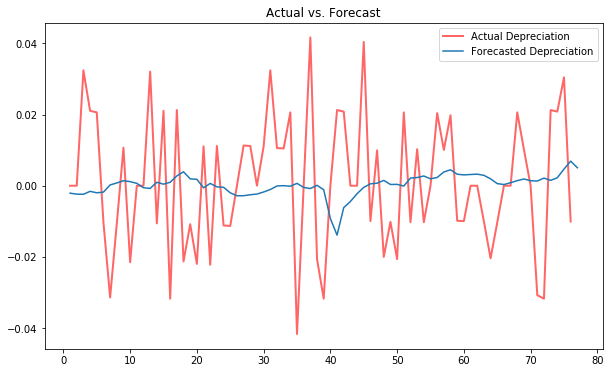

In [32]:

#实际值和UIP model值比较
dfhw_d = dfhw.set_index('date')

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

yU1= df.loc[size_subsample: size_sample, 'lCHF_1']
ax.plot(x, yU1, 'r-', linewidth=2, label=r'Actual Depreciation', alpha=0.6)

yU2= fcst_int
ax.plot(x, yU2, label = 'Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()

In [33]:
#比值偏离度
devU1=(yU1-yU2)/yU2
devU1.describe()

count     76.000000
mean     -11.689629
std       76.542195
min     -236.376758
25%      -18.727242
50%       -4.324948
75%       -1.000000
max      520.893327
Name: lCHF_1, dtype: float64

In [34]:
#差值偏离度
devU2=yU1-yU2
devU2.describe()

count    76.000000
mean      0.000910
std       0.019502
min      -0.042333
25%      -0.012800
50%       0.001328
75%       0.014412
max       0.042473
Name: lCHF_1, dtype: float64

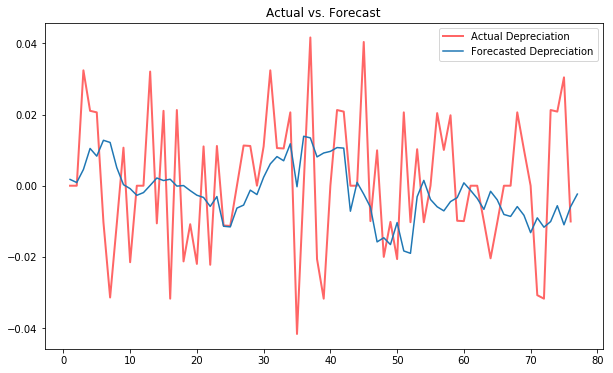

In [35]:
#实际值和泰勒值比较
dfhw_d = dfhw.set_index('date')

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

yT1 = df.loc[size_subsample: size_sample, 'lCHF_1']
ax.plot(x, yT1, 'r-', linewidth=2, label=r'Actual Depreciation', alpha=0.6)

yT2 = fcst_tr
ax.plot(x, yT2, label = 'Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()


In [36]:
#比值偏离度
devT1=(yT1-yT2)/yT2
devT1.describe()

count     76.000000
mean      -2.848180
std       77.749580
min     -501.967131
25%       -3.220681
50%       -1.000000
75%        0.995067
max      369.479091
Name: lCHF_1, dtype: float64

In [37]:
devT2=yT1-yT2
devT2.describe()


count    76.000000
mean      0.002905
std       0.019218
min      -0.043580
25%      -0.009803
50%       0.003511
75%       0.014250
max       0.042780
Name: lCHF_1, dtype: float64

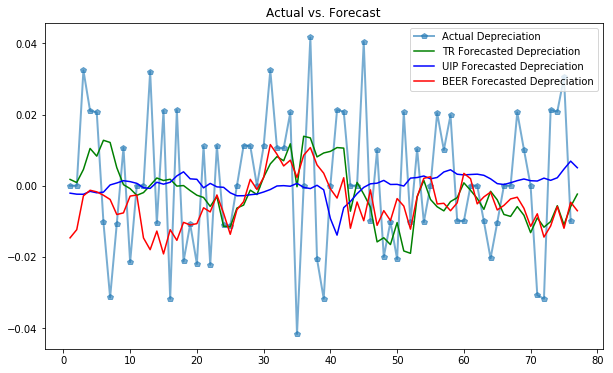

In [38]:
#预测线叠加
dfhw_d = dfhw.set_index('date')

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

y1 = df.loc[size_subsample: size_sample, 'lCHF_1']
ax.plot(x, y1, 'p-', linewidth=2, label='Actual Depreciation', alpha=0.6)


ax.plot(x, yT2, 'g-',label = 'TR Forecasted Depreciation')
ax.legend()


ax.plot(x, yU2, 'b-',label = 'UIP Forecasted Depreciation')
ax.legend()


ax.plot(x, yB2, 'r-',label = 'BEER Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()


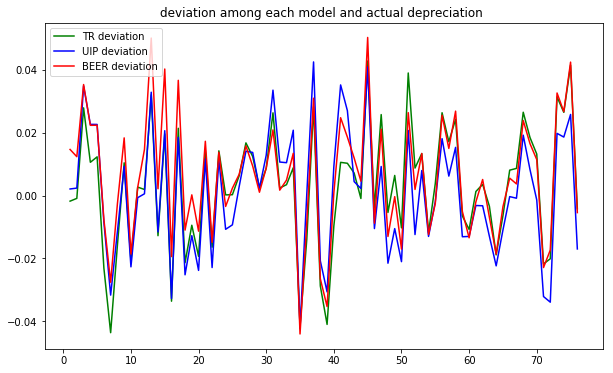

In [39]:

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

ax.plot(x, devT2, 'g-',label = 'TR deviation')
ax.legend()


ax.plot(x, devU2, 'b-',label = 'UIP deviation')
ax.legend()


ax.plot(x, devB2, 'r-',label = 'BEER deviation')
ax.legend()

ax.set_title('deviation among each model and actual depreciation ') 

plt.show()